
<b><h2><center>Project Python Foundations: FoodHub Data Analysis </center></h2></b>
<right>
<a href="https://github.com/sureshdpawar/ai-ml-projects/blob/master/project-1/PYF_Project_LearnerNotebook_FullCodeSureshPawar.ipynb" >  github link for Jupyter Notebook
</a>


# Project Python Foundations: FoodHub Data Analysis


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AI-ML

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/AI-ML


In [ ]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations:


The dataset has 1898 rows and 9 columns

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:




*   There are three different data types which are integer, float and object(string or integer mixed type)
*   Rating column is being read as object type column but we will need to replace the string with nan if we need to do exploratory data analysis using that column




In [ ]:
# Checking for missing values in the data
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


There are no missing values in a dataset.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


Food preparation time has the following values for minimum, average, and maximum:

*   Minimum: 20 Minutes
*   Average: 27.37 Minutes
*   Maximum: 35 Minutes

Based on this information, it can be inferred that these values represent the time taken to prepare food from the point of order confirmation to the food being ready for delivery or pick-up.

The average food preparation time in this dataset is calculated to be 27.37 minutes. This average value gives an indication of the typical or expected duration for food preparation.

The minimum value of 20 minutes suggests that the fastest recorded food preparation time in the dataset was 20 minutes. This represents the least amount of time taken to prepare the food.

On the other hand, the maximum value of 35 minutes indicates that the longest recorded food preparation time in the dataset was 35 minutes. This represents the maximum amount of time taken to prepare the food.
                          


In [ ]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
df['rating'].value_counts()['Not given']

736

#### Observations:



There are 736 orders that are not rated in a dataset.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

###**`Cuisine Type`**


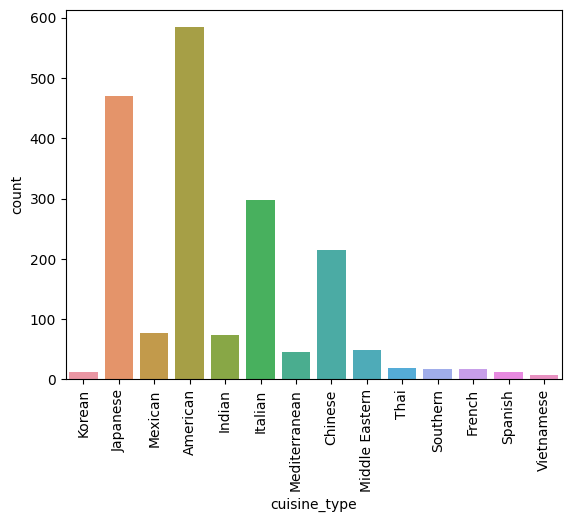

In [ ]:
# Write the code here
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

For "cuisine_type", it is evident that the four most popular food cuisines are American, Japanese, Italian, and Chinese.

###**`Days Of the week`**

<Axes: xlabel='day_of_the_week', ylabel='count'>

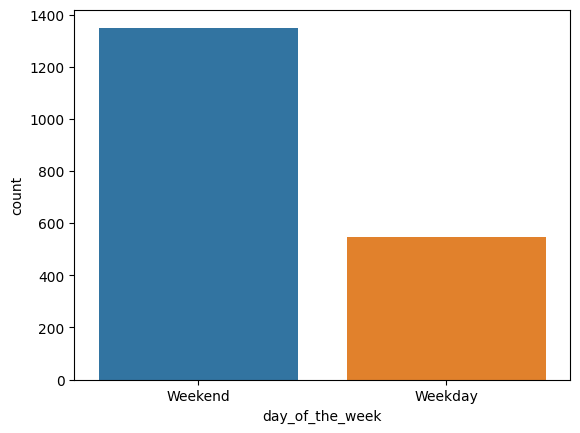

In [ ]:
sns.countplot(data=df, x = 'day_of_the_week')

For day_of_the_week column: There were more than double orders from customers on the weekends than on weekdays.

###**`Food preparation time`**

<Axes: xlabel='food_preparation_time', ylabel='Count'>

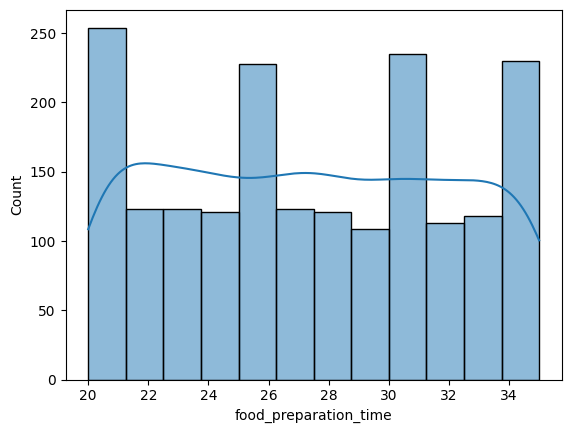

In [ ]:
sns.histplot(data=df, x = 'food_preparation_time', kde=True)

<Axes: xlabel='food_preparation_time'>

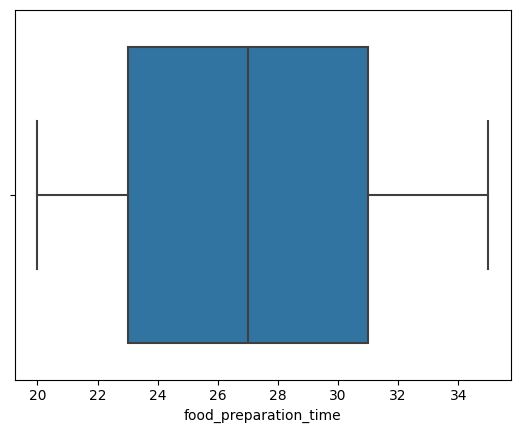

In [ ]:
sns.boxplot(data=df, x = 'food_preparation_time', )

###**`Delivery time`**

For column food_preparation_time: the food_preparation_time there are no outliers and for the most part is uniformly distributed at a count of approximately 120 counts, However there are ocassional orders that have taken time and have count of over 200.

<Axes: xlabel='delivery_time', ylabel='Count'>

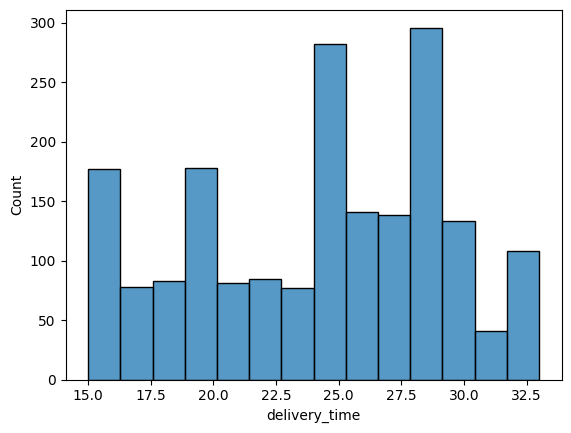

In [ ]:
sns.histplot(data=df, x = 'delivery_time')

In the plot it shows that the data slightly skewed to the left and more orders are deilvered between 25 to 30 minutes.

###**`Rating`**

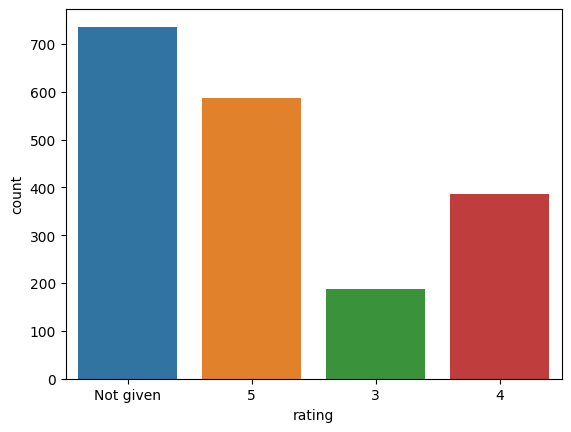

In [ ]:
sns.countplot(data=df,x='rating')
plt.show()

For rating, most of the customers over 700 times have not given rating.

###**`Cost of the order`**

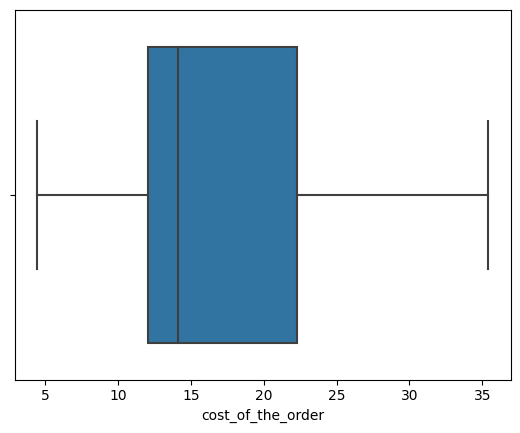

In [ ]:
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()

For cost_of_the_order the cost per order is right skewed. This means that customers are preferring food at lower cost when orderding through the app.

In [ ]:
# Write the code here
df['restaurant_name'].value_counts().nlargest(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:


The top 5 restaurants in terms of number of orders are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.

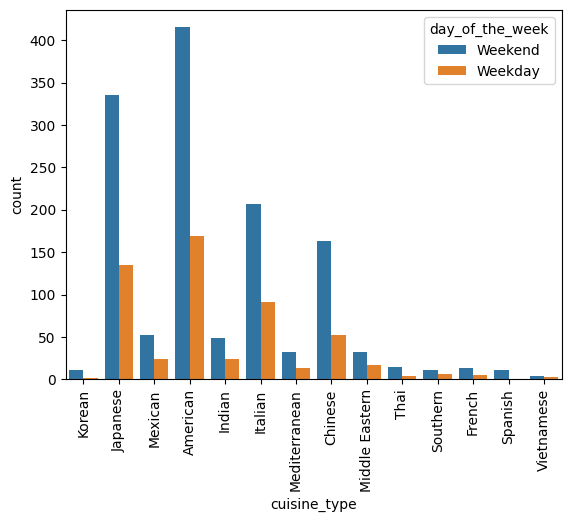

In [ ]:
# Write the code here
sns.countplot(data=df,x='cuisine_type',hue = 'day_of_the_week')
plt.xticks(rotation=90);
plt.show()

In [ ]:
df.groupby('day_of_the_week')['cuisine_type'].value_counts().nlargest(1)

day_of_the_week  cuisine_type
Weekend          American        415
Name: cuisine_type, dtype: int64

#### Observations:


Based on countplot and code snippet above the most popular cuisine on weekends is American.

In [ ]:
# Write the code here
df['cost_of_the_order'].ge(20).value_counts(normalize= True) * 100

False    70.758693
True     29.241307
Name: cost_of_the_order, dtype: float64

#### Observations:


The percentage of the orders cost more than 20 dollars is 29.24%

In [ ]:
# Write the code here
round( df['delivery_time'].mean(),2)

24.16

#### Observations:


The average delivery time for the delivery is 24.16 minutes.

In [ ]:

df['customer_id'].value_counts().nlargest(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:


The 3 customer id's that have the most frequent orders are id 52832, 47440, and 83287 an their repectiveve number of orders are 13, 10 and 9.

### Multivariate Analysis

<ipython-input-244-8605fcab0236>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)


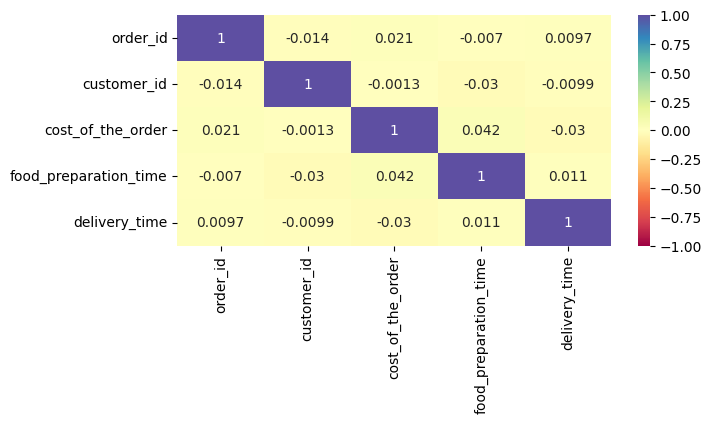

In [ ]:
# Write the code here
plt.figure(figsize=(7,3))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**Observations**
* There is not a very strong relation between entities from the dataset


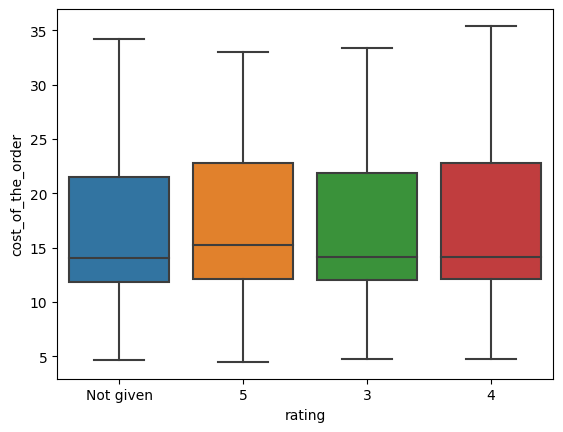

In [ ]:
sns.boxplot(data=df, x='rating', y ='cost_of_the_order')
plt.yticks(rotation=0);
plt.show()

**Observations**
* We can see that cost of the order does not affect the rating from customer

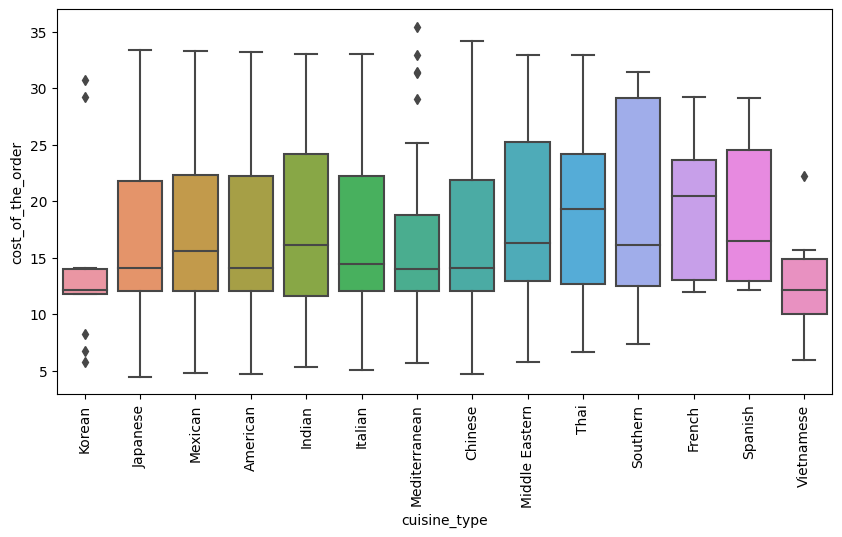

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='cuisine_type',y='cost_of_the_order')
plt.xticks(rotation=90);

**Observations**
* We can see most of the orders for different cuisine type are aound the cost of the order between 10-20 dollars
* There are also few outlies with respect to cost of the order from cuisne types like Korean, Mediterranean and Vietnamese

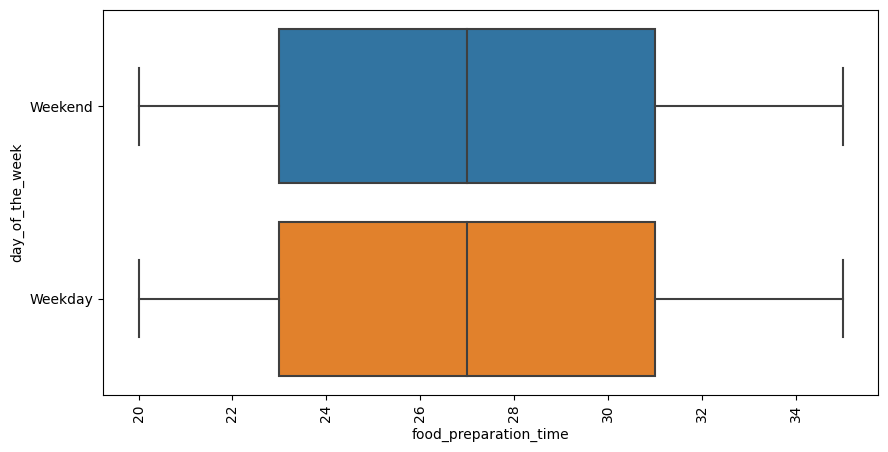

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='food_preparation_time',y='day_of_the_week')
plt.xticks(rotation=90);

**Observations**
* We can see that the food preparation time does not get affected if the order is placed on weekday or weekend

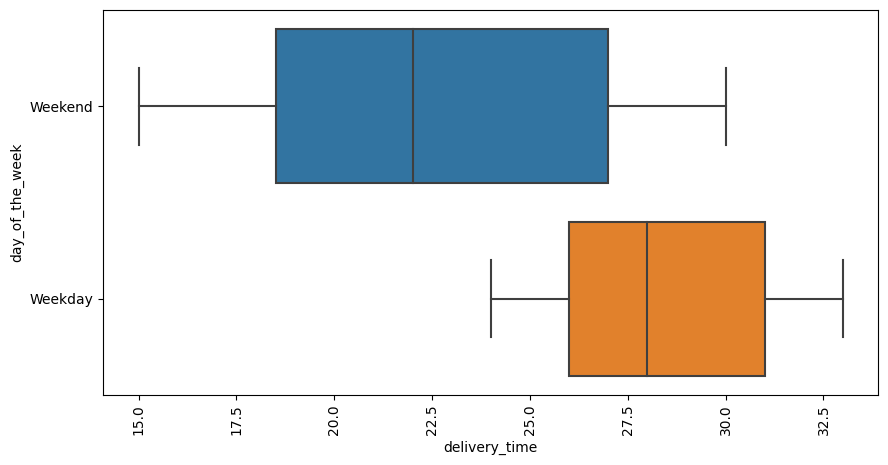

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='delivery_time',y='day_of_the_week')
plt.xticks(rotation=90);

**Observations**
* We can see that the delivery time is longer on weekdays compared to weekends, that mean orders get delivered in less time on weekend than on weekday to customers

In [ ]:
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
# replacing values with nan
df['rating'] = df['rating'].replace(['Not given'],np.nan)

# changing the data type to float
df['rating'] = df['rating'].astype(float)

df_mean_count = df.groupby(['restaurant_name'])['rating'].agg(['mean','count'])##This is to create columns that give average ratings for each restaurant and count how many ratings were given.
restaurant_rating =  df_mean_count[(df_mean_count['mean'] > 4) & (df_mean_count['count'] > 50)]## This is to filter out which results are above 4 rating and number of reviews above 50.
print(restaurant_rating)

                               mean  count
restaurant_name                           
Blue Ribbon Fried Chicken  4.328125     64
Blue Ribbon Sushi          4.219178     73
Shake Shack                4.278195    133
The Meatball Shop          4.511905     84


#### Observations:


There are four restaurants shown above Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop are eligible and fulfilling the criteria to get the promotional offer

In [ ]:
df_cost_gt_20 = df[df['cost_of_the_order'] > 20]
sum_gt_20 = df_cost_gt_20['cost_of_the_order'].sum()
print(sum_gt_20)

df_cost_gt_5 = df[(df['cost_of_the_order'] >5) & (df['cost_of_the_order'] <= 20 )]
sum_gt_5 = df_cost_gt_5['cost_of_the_order'].sum()
print(sum_gt_5)

total_revenue = sum_gt_20 * .25 + sum_gt_5 * .15
print(total_revenue)


14754.91
16517.170000000002
6166.303


#### Observations:


The total revenue generated by the company across orders based on the criteria is **6166.303**

In [ ]:
# Write the code here
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49


In [ ]:
orders_gt_60 =  df[df['total_delivery_time'] > 60]
sum_gt_60 = orders_gt_60['total_delivery_time'].count().sum()
print(sum_gt_60)

total_percentage =  sum_gt_60/df['order_id'].count()
print(round(total_percentage *100, 2) )

200
10.54


#### Observations:


There are about 10.54 % of orders that has taken more than 60 minutes to get delivered

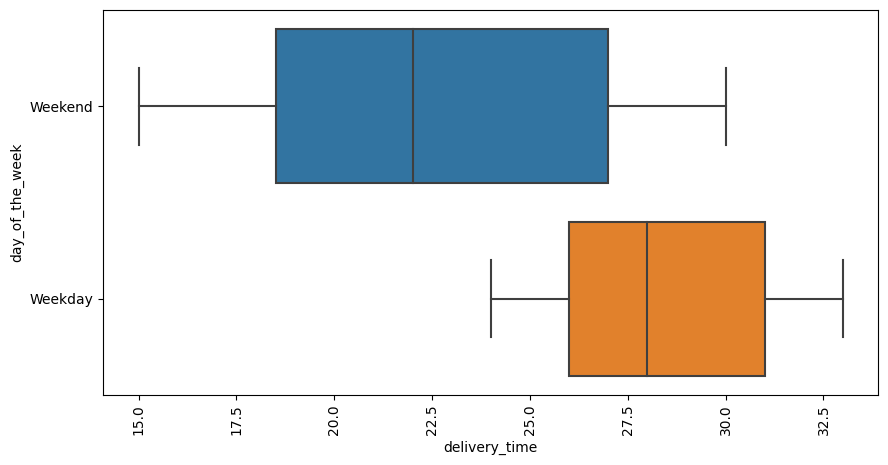

In [ ]:
# Write the code here
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='delivery_time',y='day_of_the_week')
plt.xticks(rotation=90);

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


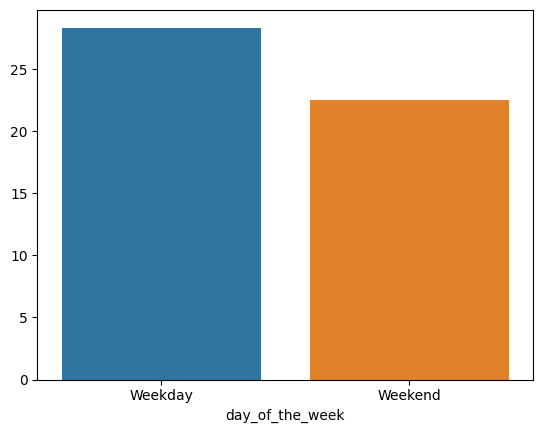

In [ ]:
mean_delivery = df.groupby(['day_of_the_week'])['delivery_time'].mean()
sns.barplot(x=mean_delivery.index, y=mean_delivery.values)
print(mean_delivery)


#### Observations:
* We can see from box plot that the delivery time is longer on weekdays compared to weekends, that mean orders get delivered in less time on weekend than on weekday to customers
* The mean delivery time differece is about 6 minutes between weekday and weekends, that means orders gets delivered on an average of about 6 minutes earlier on weekends

### Conclusion and Recommendations

### Conclusions:
*  Delivery time of orders are on an average 6 minutes longer on weekdays than weekends.
*  There are four most popular cuisines  Japanese, American, Italian and Chinese .
*  Weekend has more orders than weekdays.
*  10% of all orders take over 60 minutes to arrive at customers location.

### Recommendations:

*  Business can add more restaurants with popular cuisine types like Japanese, American, Italian and Chinese.
*  Business should find out the reason why delivery time is longer on weekdays and try to solve this problem.
*  There are many orders where rating is not given, business should create a promo offer for customers and ask them to rate a order.
*  There is not a strong relationship between attributes, business should capture more attributes in dataset so that more data analysis can be done.


---